In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pickle
from MsLightweaverAdvector import MsLightweaverAdvectorHeight
from tqdm.notebook import tqdm

In [2]:
with open('/local0/scratch/cmo/MsLightweaverHeight/RadynData.pickle', 'rb') as pkl:
    atmost = pickle.load(pkl)

In [3]:
from HydroWeno.Simulation import Grid
from HydroWeno.BCs import zero_grad_bc
from HydroWeno.Weno import reconstruct_weno_nm_z
from scipy.interpolate import interp1d

def simple_advection_bcs():
    lower_bc = zero_grad_bc('Lower')
    upper_bc = zero_grad_bc('Upper')
    def apply_bcs(grid, V):
        lower_bc(grid, V)
        upper_bc(grid, V)

    return apply_bcs

In [4]:
adv = MsLightweaverAdvectorHeight(atmost, simple_advection_bcs())

In [5]:
zHalf = atmost['zGrid'][::2]
d1Half = interp1d(adv.heightCc, adv.data[1, adv.grid.griBeg:adv.grid.griEnd], kind=3)(zHalf)

<IPython.core.display.Javascript object>


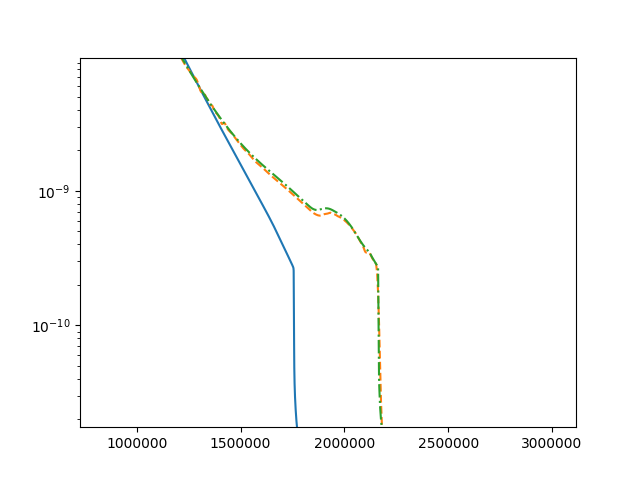

In [9]:
plt.figure()
plt.semilogy(atmost['zGrid'], atmost['d1'][0])
plt.semilogy(adv.heightCc, adv.data[1, adv.grid.griBeg:adv.grid.griEnd], '--')
plt.semilogy(atmost['zGrid'], atmost['d1'][-1], '-.')
# plt.semilogy(zHalf, d1Half, '-+')

In [10]:
d1Interp = interp1d(adv.heightCc, adv.data[1, adv.grid.griBeg:adv.grid.griEnd])(atmost['zGrid'])

<IPython.core.display.Javascript object>


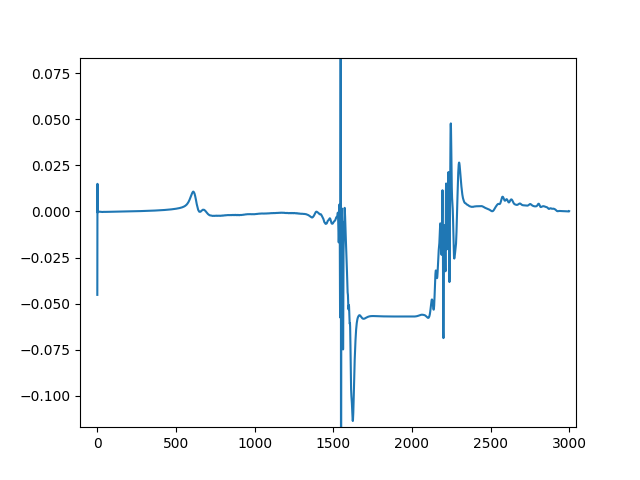

In [12]:
plt.figure()
plt.plot((d1Interp - atmost['d1'][-1]) / d1Interp)

In [8]:
for i in tqdm(range(atmost['time'].shape[0]-2)):
    adv.step()

<ipython-input-8-bcd524ca29fd>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(atmost['time'].shape[0]-2)):


/home/osborne/MsLightweaver/MsLightweaverAdvector.py:9: RuntimeWarning: divide by zero encountered in true_divide
  dt = 0.8 * np.min(grid.dx / vel)


In [ ]:
adv.data[0].max()

In [ ]:
plt.figure()
plt.plot((adv.heightCc - adv.heightGrid[::-1]) / adv.heightCc)

In [ ]:
from scipy.integrate import trapz

In [ ]:
trapz(atmost['d1'][0], atmost['zGrid'])

In [ ]:
trapz(adv.data[1, adv.grid.griBeg:adv.grid.griEnd], adv.heightCc)

In [ ]:
trapz??

In [ ]:
adv.heightCc